In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
S = input() #leitura de uma linha com os vértices
S = S.split(' ')
S = [int(i) for i in S] #conjunto vértices iniciais

2 34


In [28]:
def Dijkstra_multisource(G,S):
    
    nx.set_node_attributes(G, np.Inf, 'lambda') # setar lambda 
    nx.set_node_attributes(G, None, 'pi') # setar pi
    
    lamb = {i: np.Inf for i in G.nodes().keys()} #dicionário com o lambda dos vertices

    lamb.update({i: 0 for i in S}) #o lambda de todos os vértices iniciais recebem 0
    for v in S:    
        G.node[v]['lambda'] = 0
    
    while bool(lamb): #enquanto houver vértices no dicionário
        u = min(lamb, key=lamb.get)  #pega o vértice com menor lambda
        
        for v in nx.neighbors(G,u): #para todos os vizinhos de u
            
            #se v estiver no dicionário e o custo para chegar em v
            #passando por u for menor que o lambda de v
            #atualização do lambda de v
            if v in lamb.keys() and G.edges[v,u]['weight'] + lamb[u] < lamb[v]:
                lamb[v] = G.edges[v,u]['weight'] + lamb[u]
                G.node[v]['lambda'] = G.edges[v,u]['weight'] + lamb[u]
                G.node[v]['pi'] = u #atualização do pi de v
        
        del lamb[u] #remover o vértice u
    
    resultados = {} #dicionario com os resultados
    resultados['pi'] = nx.get_node_attributes(G,'pi')
    resultados['lambda'] = nx.get_node_attributes(G,'lambda') 
    
    Dm = pd.DataFrame(resultados) #Dataframe com os resultados
    
    Forest = nx.Graph() #criação da floresta
    Forest.add_nodes_from(G) #adição dos vértices de G na floresta

    for k in G.nodes().keys(): #Criacao das arestas na floresta
        if resultados['pi'][k] != None: #se nao for vértice inicial liga ao pai
            Forest.add_edge(k,resultados['pi'][k])
        
    return(Dm,Forest) #retorna uma tupla com o Dataframe e a floresta

In [12]:
A = np.loadtxt('WG59/wg59_dist.txt')
G = nx.from_numpy_matrix(A)

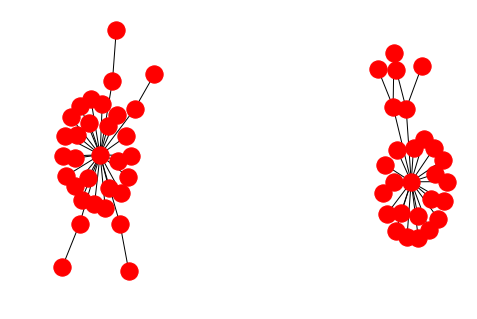

In [29]:
(r,F) = Dijkstra_multisource(G,S)
if nx.is_forest(F):
    nx.draw(F)
    plt.show() # display

In [42]:
r[50:]

,pi,lambda
50,34.0,40.0
51,55.0,121.0
52,34.0,71.0
53,2.0,41.0
54,34.0,96.0
55,2.0,35.0
56,34.0,72.0
57,2.0,81.0
58,2.0,29.0
